#**Unsupervised Learning**

**What will you learn?**
1. **Introduction**
2. **Problems** : Issues with Unsupervised Learning
3. **Types of Unsupervised Learning** : Parametric, Non-Parametric
4. **Clustering**
5. **Types of Clustering** : Flat, Heirarchical
6. **K-Means for Clustering**
7. **Sklearn's K-Means**
8. **Self Implemented K-Means**

In some pattern recognition problems, the training data consists of a set of input vectors x without any corresponding target values. The goal in such unsupervised learning problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine how the data is distributed in the space, known as density estimation. To put forward in simpler terms, for a n-sampled space x1 to xn, true class labels are not provided for each sample, hence known as learning without teacher.

# 1. Intro to unsupervised learning


## **Problems with Unsupervised Learning**
1. Unsupervised Learning is harder as compared to Supervised Learning tasks.
2. How do we know if results are meaningful since no answer labels are available?


## **Why Unsupervised Learning is needed despite of these problems?**
1. Annotating large datasets is very costly and hence we can label only a few examples manually. Example: Speech Recognition
2. There may be cases where we don’t know how many/what classes is the data divided into. Example: Data Mining
3. We may want to use clustering to gain some insight into the structure of the data before designing a classifier.



## **Types of Unsupervised Learning**

###**Parametric Unsupervised Learning**


In this case, we assume a parametric distribution of data. It assumes that sample data comes from a population that follows a probability distribution based on a fixed set of parameters. Theoretically, in a normal family of distributions, all members have the same shape and are parameterized by mean and standard deviation. That means if you know the mean and standard deviation, and that the distribution is normal, you know the probability of any future observation. Parametric Unsupervised Learning involves construction of Gaussian Mixture Models and using Expectation-Maximization algorithm to predict the class of the sample in question. This case is much harder than the standard supervised learning because there are no answer labels available and hence there is no correct measure of accuracy available to check the result.

###**Non-parametric Unsupervised Learning**

In non-parameterized version of unsupervised learning, the data is grouped into clusters, where each cluster(hopefully) says something about categories and classes present in the data. This method is commonly used to model and analyze data with small sample sizes. Unlike parametric models, nonparametric models do not require the modeler to make any assumptions about the distribution of the population, and so are sometimes referred to as a distribution-free method.

##**Clustering**

Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

<img src = "https://files.codingninjas.in/0_9ksfyh14c-aretav_-8051.png" width = 500>

# 2 Introduction to clustering


There are two types of clustering :
1. Flat Clustering
2. Hierarchical Clustering

####**Flat Clustering**




Flat clustering is where we tell the model how many categories to cluster the data into. 



#### **Hierarchical Clustering**


Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

Two important things that you should know about hierarchical clustering are:
1. This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.
2. The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters such as Euclidean distance, Squared Euclidean distance , Manhattan distance, etc. 

# 3. Using KMeans for Flat Clustering


##**K-Means Clustering**

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. 

The basic idea is to define k centres, one for each cluster.The centroids are placed as much as possible far away from each other. The next step is to take each point belonging to a given data set and associate it to the nearest centroid. When no point is pending, the first step is completed and an early groupage is done. At this point we need to re-calculate k new centroids as barycenters of the clusters resulting from the previous step. After we have these k new centroids, a new binding has to be done between the same data set points and the nearest new centroid. A loop has been generated. As a result of this loop we may notice that the k centroids change their location step by step until no more changes are done.

Finally, this algorithm aims at minimizing an objective function, in this case a squared error function. The objective function
$$\sum_{j=1}^{k}\sum_{i=1}^{k}||x_i^j - c_j||^2$$
where $$||x_i^j - c_j||$$

chosen distance measure between a data point xi and the cluster centre cj, is an indicator of the distance of the n data points from their respective cluster centres

# 4. KMeans Algorithm

1. Specify the number of clusters k to assign.
2. Randomly initialize k centroids.
3. **repeat**
4. **expectation**: Assign each point to its closest centroid.
5. **maximization**: Compute the centroid of each cluster.
6. **until** the centroid position does not change.

When we talk abt kmeans, we are trying to get to k clusters, but these clusters are defined by their mean values. For eg, if I make k clusters and we get new datapoint p, how will we decide which cluster this datapoint will go to?  
That will be decided by which clusters mean is closest to this datapoint p. So we will find distance between this p and mean of all clusters, and we will pick all the clusters whose mean is closest to this point p. So in a way while calculating these clusters, we will just store the mean values.  
Now for any point we want to figure out which clusters it belongs to, just find the distance to all the means, and we would know which point belongs to which clusters.  
So the steps of kmeans Algorithm is  
1. **Lets Randomly pick k means value.** Which means from our dataset, we will just randomly pick k points as our mean points. 
2. **Assign each datapoint a cluster.** How do we assign? By simply seeing which mean is closest to that datapoint.  
3. **Find the New Mean values of our clusters.**
4. **Then we will go back to step and repeat 2 and 3.** 
We can either stop at max no of iterations or we can stop when there is nothing changing in our datapoint system which means the mean value is not changing and if the mean value is not changing once, they will not change later on as well.    
  
  
So the two terminating conditions are  
1. max iteration
2. No more changes. 
or we can use combination of both, which means lets say we are running it for fix iteration, and we see that there is no more changes happening, we will stop.  
  
Its possible that we will start with really bad mean values, we pick up some mean values which are really bad, that can lead to an inefficient clustering as well. So kmeans does not necessarily means we will end up with the best clustering possible. So lots of time we will run this algorithm two or three times and take the best clustering as we get to.

## 5. K-Means using Sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

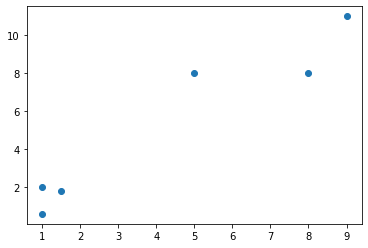

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
# to use k means we need to import kmeans 
from sklearn.cluster import KMeans

In [5]:
# by default, it takes n_clusters as 8. This will create object for us.
k_means = KMeans(n_clusters = 2)

In [6]:
k_means.fit(X)

KMeans(n_clusters=2)

**Arguments**     
**precompute_distances = 'auto'** : This is basically optimization that sklearn is doing it will try and compute the distances
first so that we dont have to calculate again and again.    
**init = 'k-means++'** : This is actually how do we initialize the first k points, so if we have to do it, we might just pick randomly k points, its using an algorithm called k-means++ which tries to pick these points in a way that they are spread out.  
**max_iter = 300** : How many times we want to update our means and update the clusters.  
**n_init = 10** : This means how many times do we want to initialize and run our algorithm again(different kinds of initialization). We will start with one initialization, run the algorithm, reach some point then we will run it again with some other initialization and eventually whichever initialization will give us best result we will use that.  
So which clustering is better we are going to define that using function which we defined earlier which is sum of distances of each point to the mean of the cluster which they belong to. Thats the error function which we want to minimize. So if we run this algorithm 10 times, with different initializations whichever initialization gives us the best or the minimum loss function, we will pick that solution.

In [7]:
k_means.labels_
# labels means which points got into which cluster.

array([0, 0, 1, 1, 0, 1])

In [8]:
# we can also look at mean values
k_means.cluster_centers_

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

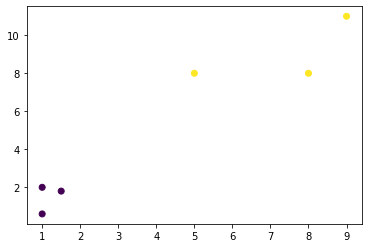

In [9]:
# lets try to plot this.
plt.scatter(X[:, 0], X[:,1], c = k_means.labels_) # what this means is we have 6 points here and we are giving array of size 6 
                                                  # as colors. SOme of them has 1, some of them has 0. So 1 will get the differ
                                                  # color and 0 will get the different color.
plt.show()

So as we can see, different clusters have different color.

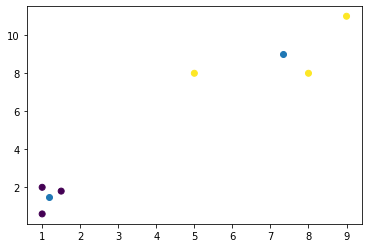

In [12]:
# lets plot the means as well.
plt.scatter(X[:, 0], X[:,1], c = k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1]) # so we have grabbed 0th feature as x axis and 1st 
                                                                            # feature as y axis.
    
plt.show()

As we can see, mean is represented by blue color.

**Lets give clusters to be 3 and run it again**

In [13]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X)

KMeans(n_clusters=3)

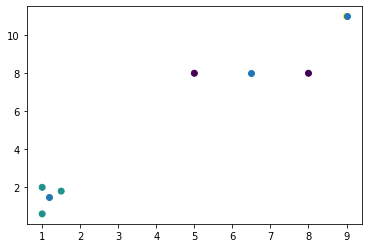

In [14]:
plt.scatter(X[:, 0], X[:,1], c = k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1])
plt.show()

Seems like what happened is we have one cluster which is green, its fine and then we have one cluster in purple which is also fine and it has taken one cluster which we can see is overlapped by the mean in the upper right corner which seems to be in yellow color.

----------------

----------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

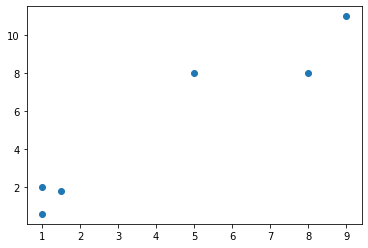

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters = 2)

In [ ]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means.labels_

array([0, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
k_means.cluster_centers_

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

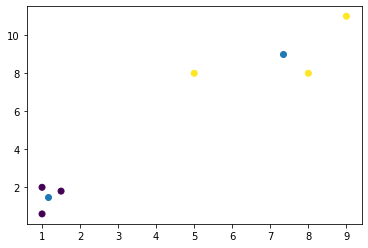

In [ ]:
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])
plt.show()

##**Self-Implementation of K-Means**

Here we will code our own K-means algorithm usinf Fit and Predict functions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

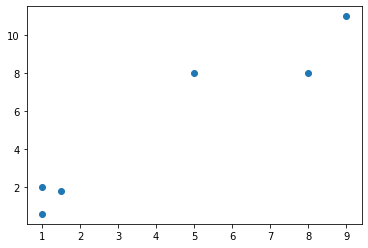

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

--------

-----------

# 6. Starter Code for KMeans  
Basic intuition behind this is, lets say we have a training data, we will pass one testing data point and find its distance wrt all training datapoints, and then we will find first k nearest points, then find class of those point and then that class is the class of that particular datapoint.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

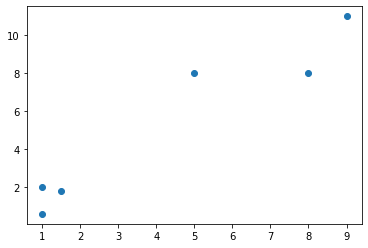

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

Fit function will require the data it needs to classify, it needs the clusters which is k = 2 by default and it needs max iteration which we give it to be 100.   
First step is to maintain list of means at all times. what all my means values right now. We will initialize this list with random values and update it.  
Second thing we will need is an array of arrays with k entries where each entries will represent what all datapoints are in cluster1, what all datapoints are in cluster2 and so on. We need this info because the third step we do, is find the new mean values. For finding new mean values, we need to know what all points are in clusters so that we can find the new mean values.  
So the things we need to maintain is 
1. List of means
2. cluster information i.e. which point belongs to which cluster.    
  
  
Dry Run of Fit():  
1. Create empty mean array and append first two entries
2. Run a loop for max iter times
3. make an empty cluster array and add k no of empty array in it.
4. Go through each datapoint. 
5. find distances of that point from all means. 
6. find the mimimum distances and find the mean value which is at mimimum distance.  
7. Append that datapoint to that cluster  
8. For next part, we need to find new mean values so we find new mean values of k clusters, and check if the mean is same or not, if not then we will make change = True.  
9. else we will change the mean, if the mean is same, we will break then.

In [10]:
# implementing the fit function.
def fit(data, k = 2, max_iter = 100):
    means = []
    # 1. we will have to randomly initialize the means
    # for this we will pick the first k datapoints and assign them to be initial means.
    for i in range(k):
        means.append(data[i])
    #2. now we need to run max iter times 
    for i in range(max_iter):
        #3. first thing we do is assign the datapoints to the cluster that they belong to.
        # create empty clusters.
        clusters = []
        for i in range(k):
            #4.everytime we start new iteration, we are going to start with empty clusters coz we are going to
            # reassign all the datapoints to clusters. So we are going to have some means, assign some datapoints to some 
            # clusters, calculate the new means and then assign the datapoints to new clusters.
            clusters.append([])
        
        #5. so we need to go through each datapoints.
        for point in data:
            #6. so we need to first find the distance to all the mean values
            # so we will go through all the means and find the distances of all m wrt the point that we have and
            # point is np array. point - m will give us elementwise subtraction. 
            distances = [((point - m)**2).sum() for m in means]
            
            # and find the min distance
            minDistances = min(distances)
            
            # and find the mean for which we got the min distance --> lets say mean is l.
            l = distances.index(minDistances)

            # Add this point to cluster l.
            clusters[l].append(point)
            
            # As we are done with this, we are done with the first part which is assign the datapoints to clusters that they 
            # belong to.
            
            
            
        
        #7. second step we are supposed to do is calculate the mean values.
        # if there is no change in mean value at all, we will return
        change = False
        for j in range(k):
            # if we dont provide axis =0 it will find the average of cluster j of all the points and combines the x1 and x2 
            # values as well.
            new_mean = np.average(clusters[j], axis=0)
            # below means if new mean is not equal to old mean value, we will make change = true.
            if not np.array_equal(means[j], new_mean):
                change = True
            means[j] = new_mean
        if not change:
            break
                
        return means

In [11]:
fit(X)

[array([1., 2.]), array([4.9 , 5.88])]

In [12]:
# predict will tell us which point belongs to which cluster.
def predict(test_data, means):
    predictions = []
    for point in test_data:
        # find distances to all mean values.
        distances = [((point - m)**2).sum() for m in means]
        
        # and find the min distance
        minDistances = min(distances)
            
        # and find the mean for which we got the min distance --> lets say mean is l.
        l = distances.index(minDistances)
        
        # add this point to cluster l
        predictions.append(l)
    return predictions
        

In [13]:
means = fit(X)
predict(X, means)
# thats what we got in sklearn as well

[0, 0, 1, 1, 0, 1]

----------

--------

# 8. Implementing KMeans Class


In [52]:
class K_Means:
    def __init__(self):
        print("constructor")
        
        
        
    def fit (self, data, k = 2, max_iter = 100):
        means = []
        # randomly initialize the means
        for i in range(k):
            means.append(data[i])
        for i in range(max_iter):
            # assign the data points to the cluster that they belong to
            # create empty clusters        
            clusters = []
            for j in range(k):
                clusters.append([])
            for point in data:
                # find distance to all the mean values
                distances = [((point - m)**2).sum() for m in means]
                # find the min distance
                minDistance = min(distances)
                # find the mean for which we got the minimum distance --> l
                l = distances.index(minDistance)
                # add this point to cluster l
                clusters[l].append(point)

            # calculate the new mean values
            change = False
            for j in range(k):
                new_mean = np.average(clusters[j], axis=0)
                if not np.array_equal(means[j], new_mean):
                    change = True
                means[j] = new_mean
            if not change:
                break
        return means
    
    def predict(self, test_data, means):
        predictions = []
        for point in test_data:
           # find distance to all the mean values
            distances = [((point - m)**2).sum() for m in means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distance --> l
            l = distances.index(minDistance)
            # add this point to cluster l
            predictions.append(l)
        return predictions

In [53]:
# creating the object of class
kmeans =  K_Means()

constructor


In [54]:
# creating fit function
means = kmeans.fit(X)

In [55]:
kmeans.predict(X, means)

[0, 0, 1, 1, 0, 1]

**Passing K and Iterations Manually**  
Ideally we dont pass means as argument in predict function.  
and K and max_iter should be in constructor.  
Similarly we want means to be used by predict function.  
  
In a nutshell, we will pass k and means and max_iteras parameter, so we create class for it and pass it inside object of class. 
So change jo hoga, har jagah means, max_iter and k ke pehle self.k and self.means and self.max_iter hojaayega. Thats it.

In [72]:
class K_Means:
    def __init__(self, k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
        
        
    def fit (self, data):
        self.means = []
        # randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign the data points to the cluster that they belong to
            # create empty clusters        
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for point in data:
                # find distance to all the mean values
                distances = [((point - m)**2).sum() for m in self.means]
                # find the min distance
                minDistance = min(distances)
                # find the mean for which we got the minimum distance --> l
                l = distances.index(minDistance)
                # add this point to cluster l
                clusters[l].append(point)

            # calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis=0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
           # find distance to all the mean values
            distances = [((point - m)**2).sum() for m in self.means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distance --> l
            l = distances.index(minDistance)
            # add this point to cluster l
            predictions.append(l)
        return predictions

In [73]:
# creating the object of class
kmeans =  K_Means(2, 10)

constructor


In [76]:
# creating fit function
means = kmeans.fit(X)

In [77]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [78]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

-----------

---------

####**Class of K-Means**

In [48]:
class K_Means:
    def __init__(self, k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
        
        
    def fit (self, data):
        self.means = []
        # randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign the data points to the cluster that they belong to
            # create empty clusters        
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for point in data:
                # find distance to all the mean values
                distances = [((point - m)**2).sum() for m in self.means]
                # find the min distance
                minDistance = min(distances)
                # find the mean for which we got the minimum distance --> l
                l = distances.index(minDistance)
                # add this point to cluster l
                clusters[l].append(point)

            # calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis=0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
           # find distance to all the mean values
            distances = [((point - m)**2).sum() for m in self.means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distance --> l
            l = distances.index(minDistance)
            # add this point to cluster l
            predictions.append(l)
        return predictions

In [49]:
kmeans = K_Means(2, 10)

constructor


In [50]:
kmeans.fit(X)

In [51]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [ ]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

##**Applications of Clustering**

Clustering has a large no. of applications spread across various domains. Some of the most popular applications of clustering are:
1. Recommendation engines
2. Market segmentation
3. Social network analysis
4. Search result grouping
5. Medical imaging
6. Image segmentation
7. Anomaly detection